# Checking spin up of CCLM soil temperature 

In [1]:
import valenspy as vp
from valenspy.preprocessing_tasks.regrid import remap_cdo
from valenspy.preprocessing_tasks.select import select_point

from valenspy.diagnostic_visualizations import *
import matplotlib.pyplot as plt
import warnings
import xarray as xr
import numpy as np


# Turn off all warnings
warnings.filterwarnings('ignore')

### 0. Settings

In [2]:
# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'

# directory with experiments

experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_1994_NU_TT_EC_TSO", "EUR11_1993_NU_TT_EC_TSO"]
# , "EUR11_1993_NU_TT_EC_TSO"
experiment = experiments[0]

# do selection of individual points (do this in separate notebook.)
# Define the coordinates
d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
    'channel'   : (-1.05, 50.14)
}
point_id = 'opwijk'
point_coord = d_point_coords[point_id]


# start up input manager
manager = vp.InputManager(machine=machine)


In [3]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def compare_soil_spinup_experiments(experiments, year_to_analyse, months_to_analyse):
    variable = 'tsl'
    if len(experiments) < 2:
        print("Not enough experiments to compare")
        return
    nb_combinations = factorial(len(experiments)-1)
    print(nb_combinations)
    fig, axes = plt.subplots(nb_combinations+1,1,figsize = (7,8))
    plt.subplots_adjust(hspace=0.7)
    print(axes)
    axes=axes.flatten()
    print(axes)
    diff_list = []
    nb_plot = 0
    
    for exp1 in experiments:
        print(exp1)
        ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[exp1, "daymean"])
        ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
        # Select the data for the specific year and months
        da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
        da_mod_point_exp1 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
        for exp2 in experiments:
            if exp1 != exp2:
                print(exp2)
                ax = axes[nb_plot]
                ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[exp2, "daymean"])
                ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
                da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
                da_mod_point_exp2 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
                diff = da_mod_point_exp1 - da_mod_point_exp2
                combination1 = exp1 + "  -  " + exp2
                combination2 = exp2 + '-' + exp1
                if combination1 not in diff_list and combination2 not in diff_list:
                    diff_list.append(exp1 + "-" + exp2)
                    print(nb_plot)
                    for soil_level in da_mod_point_exp1.soil1: 
                        diff.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
                        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

                        ax.set_title(' ', loc='center')
                        #ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
                        ax.set_title(combination1, loc='left')
                    ax.grid(visible = True)
                    nb_plot = nb_plot + 1
    

    # return diff_list

        


## 1. Loading and plotting

### 1.1 soil temperature

EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% 

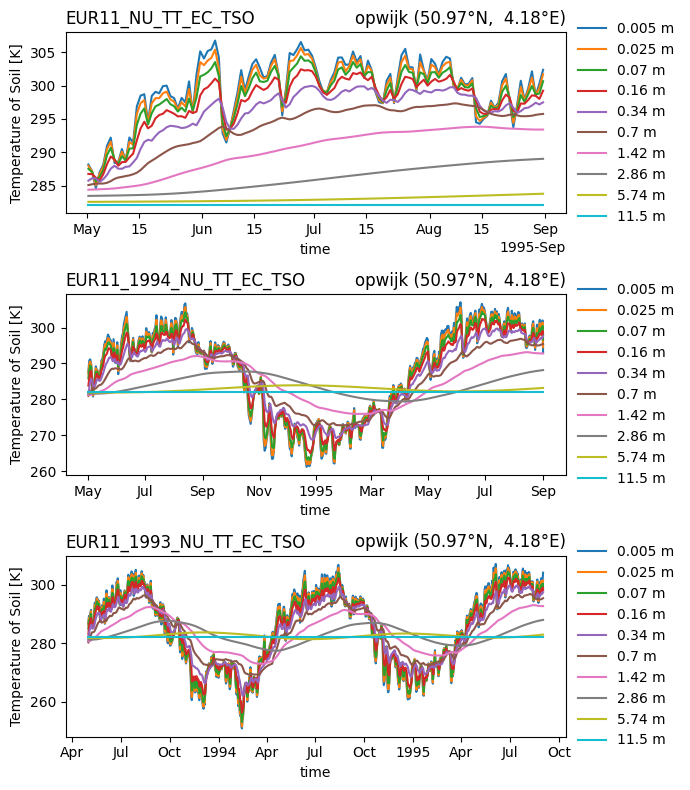

In [4]:
#experiments = ['BE28_Nick', 'BE28_Ruben', 'BE28_Nukleus']
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% 

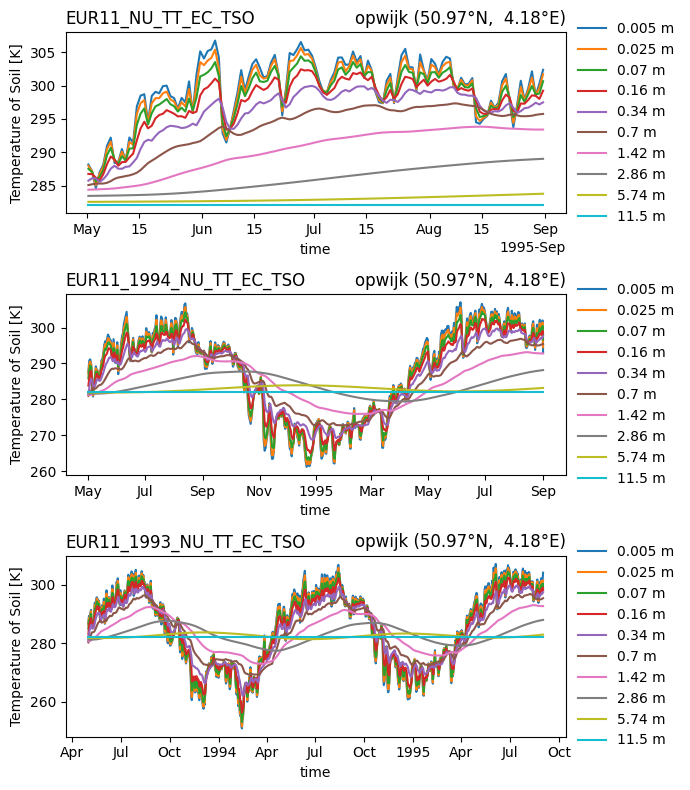

In [5]:
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% 

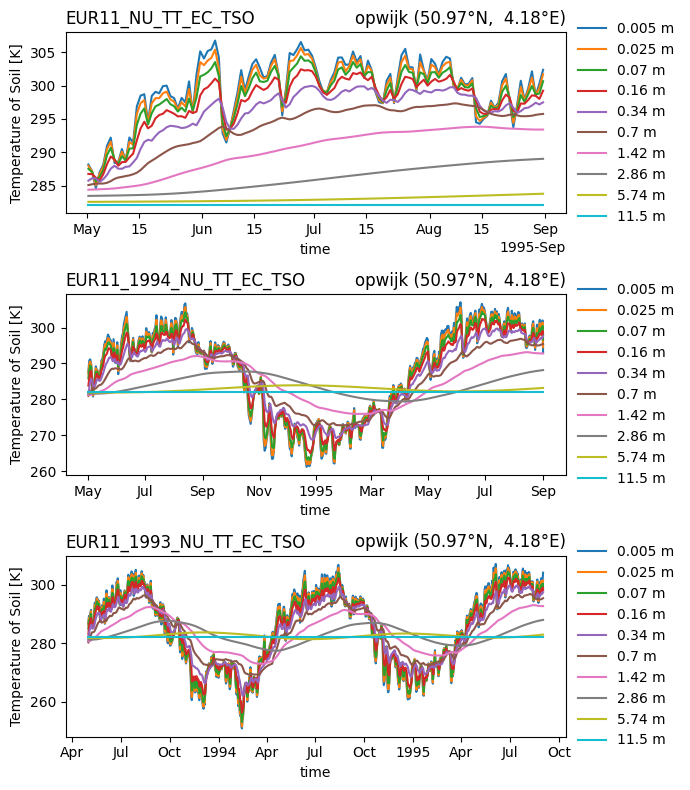

In [6]:
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% 

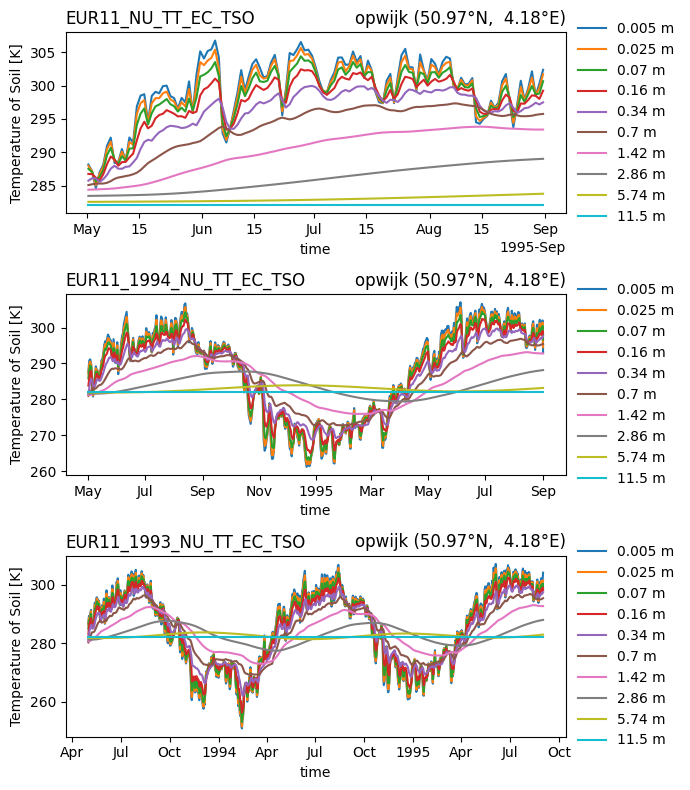

In [7]:
#experiments = ['BE28_Nick', 'BE28_Ruben']
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_1993_NU_TT_EC_TSO


File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


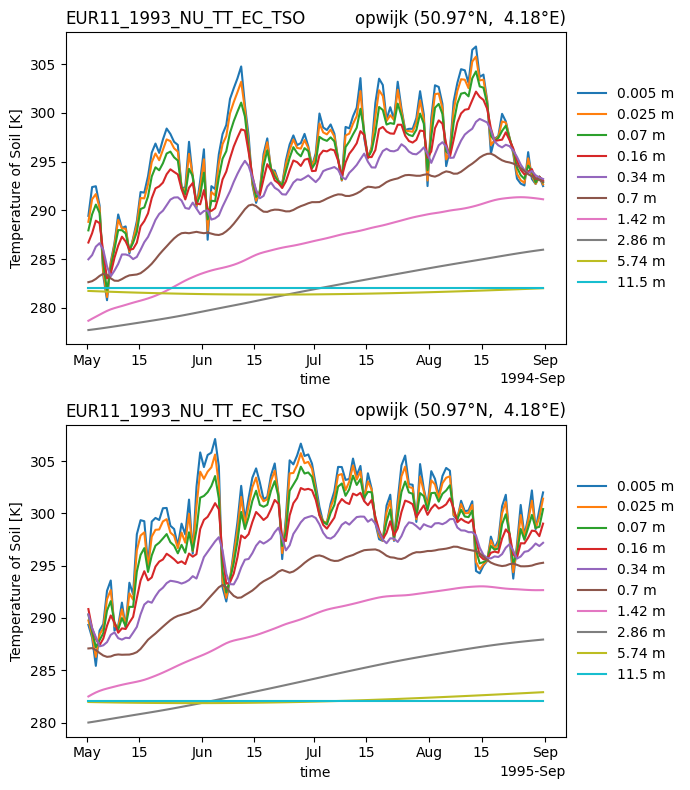

In [8]:
variable = 'tsl'

fig, axes = plt.subplots(2,1,figsize = (7,8))
axes=axes.flatten()

experiment = experiments[-1]

print(experiment)


ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
months_to_analyse = [5, 6, 7, 8]
year_to_analyse = 1994

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))

ax = axes[0]

for soil_level in da_mod_point.soil1: 

    da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(experiment, loc='left')

year_to_analyse = 1995

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
ax = axes[1]

for soil_level in da_mod_point.soil1: 

    da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(experiment, loc='left')
fig.tight_layout()



EUR11_1993_NU_TT_EC_TSO


File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


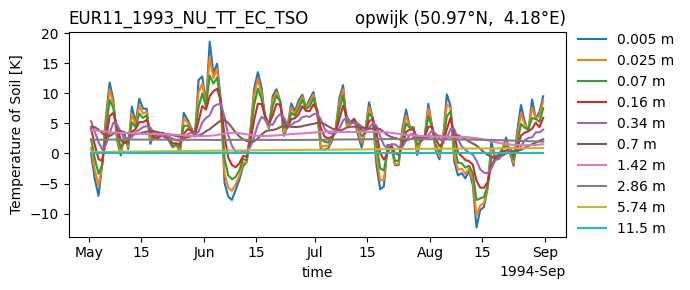

In [9]:
variable = 'tsl'

fig, ax = plt.subplots(1,1,figsize = (7,3))

experiment = experiments[-1]

print(experiment)


ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
months_to_analyse = [5, 6, 7, 8]
year_to_analyse = 1994

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point_1994 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
year_to_analyse = 1995

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point_1995 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
da_mod_point_1995['time'] = da_mod_point_1994.time
diff = da_mod_point_1995 - da_mod_point_1994

for soil_level in da_mod_point.soil1: 

    diff.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(experiment, loc='left')


fig.tight_layout()



2
[<Axes: > <Axes: > <Axes: >]
[<Axes: > <Axes: > <Axes: >]
EUR11_NU_TT_EC_TSO


File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
0
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables 

IndexError: index 3 is out of bounds for axis 0 with size 3

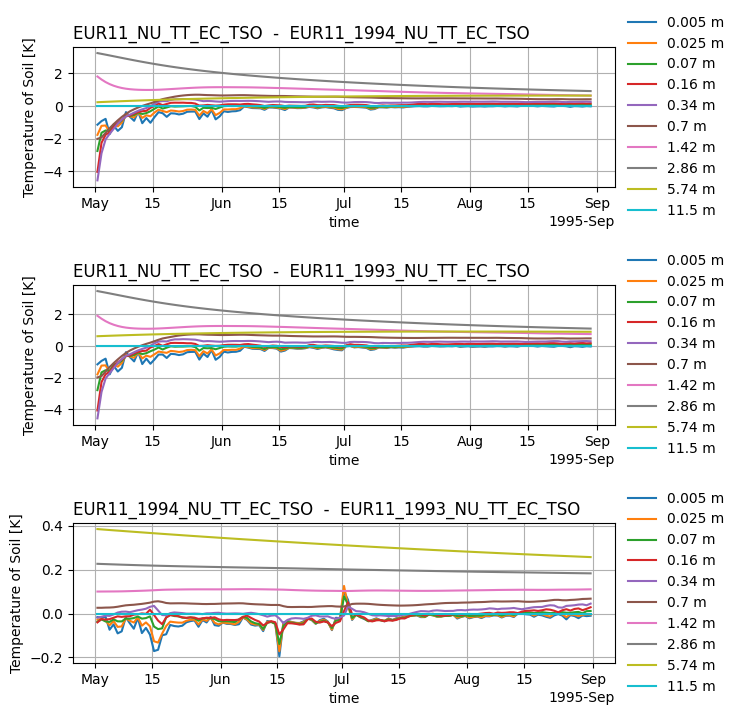

In [10]:
#experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_1994_NU_TT_EC_TSO", "EUR11_1993_NU_TT_EC_TSO"]
experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_1994_NU_TT_EC_TSO", "EUR11_1993_NU_TT_EC_TSO"]
year_to_analyse = 1995
months_to_analyse = [5, 6,7,8]
compare_soil_spinup_experiments(experiments, year_to_analyse, months_to_analyse)

### 1.2 soil moisture

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF complian

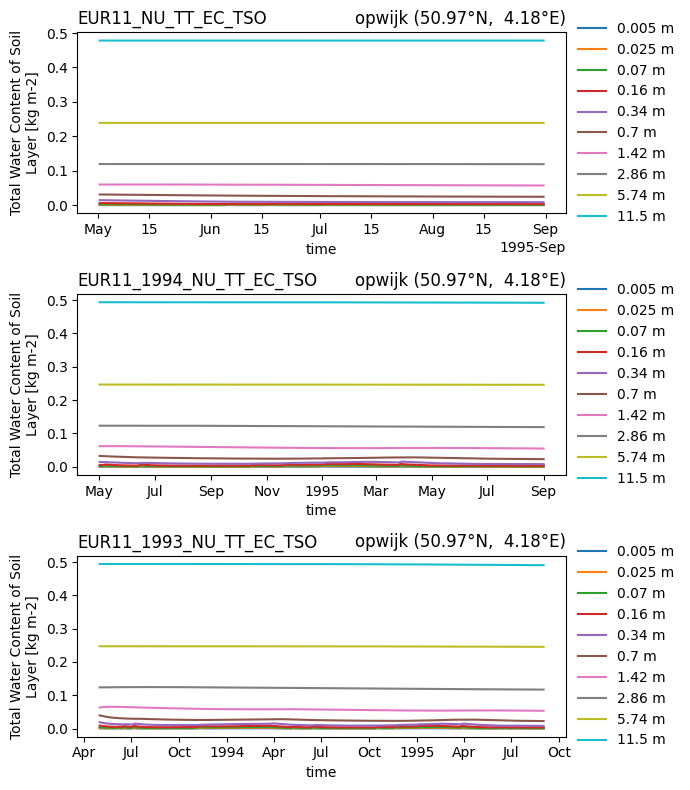

In [8]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        

fig.tight_layout()

### relative soil moisture (not the same as volumetric - for this the bulk density of CCLM is necessary!!)

In [20]:
da_mod_point.soil1

<xarray.DataArray 'soil1' (soil1: 10)> Size: 40B
array([5.00e-03, 2.50e-02, 7.00e-02, 1.60e-01, 3.40e-01, 7.00e-01, 1.42e+00,
       2.86e+00, 5.74e+00, 1.15e+01], dtype=float32)
Coordinates:
    lon      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    lat      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    rlon     float32 4B 19.36
    rlat     float32 4B 1.045
  * soil1    (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 1.42 2.86 5.74 11.5
Attributes:
    standard_name:  depth
    long_name:      depth of soil layers
    units:          m
    positive:       down
    axis:           Z
    bounds:         soil1_bnds

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF complian

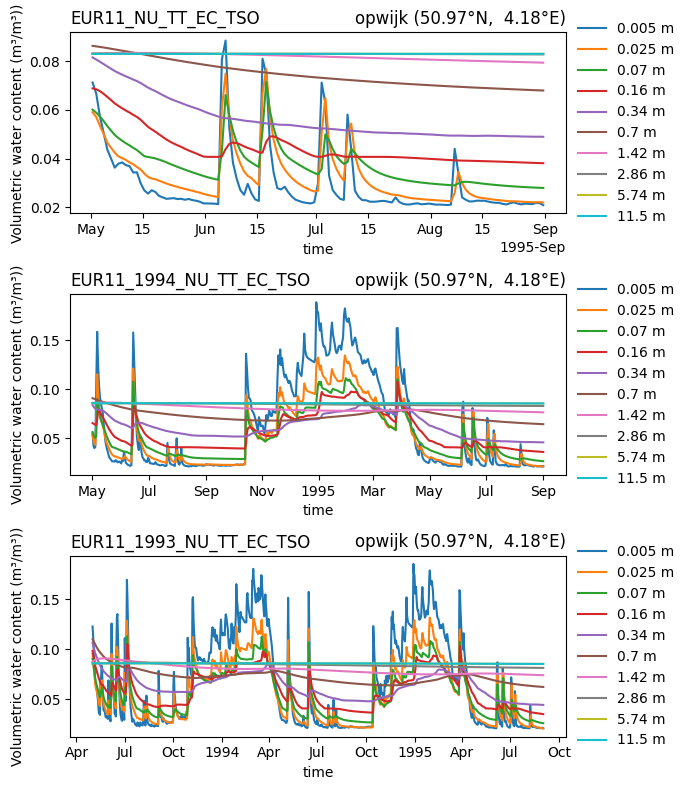

In [22]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]
    soil_depth = np.insert(ds_mod_point.soil1.values,0,0)
    soil_thickness = np.diff(soil_depth)
    da_mod_point_rel = da_mod_point / soil_thickness
    
    for soil_level in da_mod_point.soil1: 

        da_mod_point_rel.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        ax.set_ylabel('Volumetric water content (m³/m³))')

fig.tight_layout()

### Volumetric soil moisture: comparison with ERA5

CCLM: soil water content (m)

ERA5: volumetric soil water content (m³water/m³ soil)


CCLM -> convert soil water content to relative soil water content (ratio to pores)
porosity of soil


vol metric water content = absolute water content (meters)/soil layer thickness (meters) * porosity (dimensionless)



In [10]:
#  w_so_rel_in,    & ! multi-layer relative   soil moisture

# pore volume, hard coded in int2lm source code: https://gitlab.kuleuven.be/rcs/cclm/cosmo_rcs/-/blob/main/int2lm/src/src_2d_fields.f90#L2581 
porosity = np.array([1.E-10,1.E-10, 0.364, 0.445, 0.455, 0.475, 0.507, 0.863, 1.E-10, 1.E-10])


In [11]:
len(porosity)

10

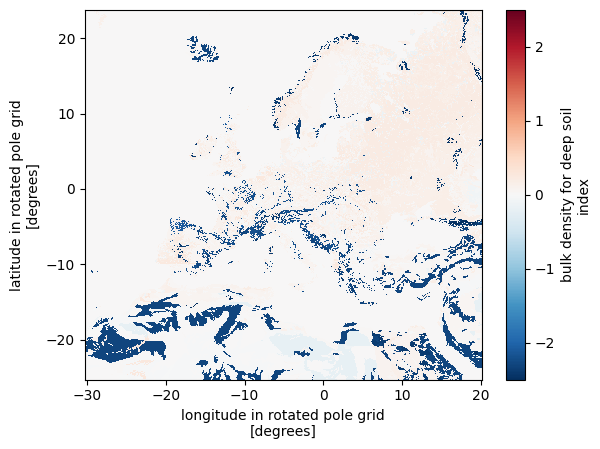

In [38]:
(ds_extpar_soil['SUB_BULK_DENS'] - da_bulk_dens).plot()

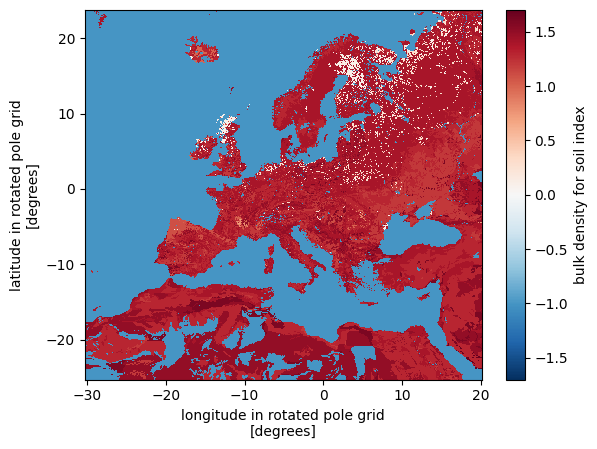

In [37]:
## load bulk density file

extpar_dir = '/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/extpar_files/'
extpar_file = 'extpar_cordex_ecoclimap_terra_isoil_data_2.nc'

ds_extpar_soil = xr.open_dataset(extpar_dir+extpar_file)
da_bulk_dens = ds_extpar_soil['BULK_DENS']

da_bulk_dens.plot()

In [46]:
ds = xr.open_dataset('/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/wouterl/exp_fiens_eval_setup_JJA1995_transient_aerosol_ECOCLIMAP/out_int2lm_soilT/laf1995050100.nc')
ds

<xarray.Dataset> Size: 362MB
Dimensions:       (rlon: 446, rlat: 434, srlon: 446, srlat: 434, level1: 41,
                   soil1: 10, bnds: 2, time: 1, level: 40)
Coordinates:
  * rlon          (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat          (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
    lon           (rlat, rlon) float32 774kB ...
    lat           (rlat, rlon) float32 774kB ...
  * srlon         (srlon) float32 2kB -29.53 -29.42 -29.31 ... 19.2 19.31 19.42
  * srlat         (srlat) float32 2kB -24.53 -24.42 -24.31 ... 22.88 22.99 23.1
    slonu         (rlat, srlon) float32 774kB ...
    slatu         (rlat, srlon) float32 774kB ...
    slonv         (srlat, rlon) float32 774kB ...
    slatv         (srlat, rlon) float32 774kB ...
  * soil1         (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 2.86 5.74 11.5
  * time          (time) datetime64[ns] 8B 1995-05-01
Dimensions without coordinates: level1, bnds, level
Data variables: (12/57)
    rotated_pole  |S1 1B ...
    vcoord        (level1) float32 164B ...
    soil1_bnds    (soil1, bnds) float32 80B ...
    time_bnds     (time, bnds) datetime64[ns] 16B ...
    HSURF         (time, rlat, rlon) float32 774kB ...
    FR_LAND       (time, rlat, rlon) float32 774kB ...
    ...            ...
    QR            (time, level, rlat, rlon) float32 31MB ...
    QS            (time, level, rlat, rlon) float32 31MB ...
    T_SO          (time, soil1, rlat, rlon) float32 8MB ...
    W_SO          (time, soil1, rlat, rlon) float32 8MB ...
    FRESHSNW      (time, rlat, rlon) float32 774kB ...
    T_S           (time, rlat, rlon) float32 774kB ...
Attributes:
    Conventions:     CF-1.5
    conventionsURL:  http://www.cfconventions.org/
    creation_date:   2024-07-22 10:06:41
    standard_name:   
    long_name:       
    units:           
    grid_mapping:    rotated_pole

In [47]:
ds['W_SO']

<xarray.DataArray 'W_SO' (time: 1, soil1: 10, rlat: 434, rlon: 446)> Size: 8MB
[1935640 values with dtype=float32]
Coordinates:
  * rlon     (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat     (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
    lon      (rlat, rlon) float32 774kB ...
    lat      (rlat, rlon) float32 774kB ...
  * soil1    (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 1.42 2.86 5.74 11.5
  * time     (time) datetime64[ns] 8B 1995-05-01
Attributes:
    standard_name:  lwe_thickness_of_moisture_content_of_soil_layer
    long_name:      soil water content
    units:          m
    grid_mapping:   rotated_pole

In [16]:
ds = xr.open_dataset('/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/int2lm_input_data/ERA5_forcing/cas1998122501.nc')

In [17]:
ds['T_SO']

<xarray.DataArray 'T_SO' (time: 1, soil1: 4, lat: 224, lon: 544)> Size: 2MB
[487424 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 896B 19.25 19.53 19.81 20.09 ... 81.36 81.64 81.92
  * lon      (lon) float32 2kB -68.91 -68.62 -68.34 -68.06 ... 83.25 83.53 83.81
  * soil1    (soil1) float32 16B 0.035 0.175 0.64 1.945
  * time     (time) datetime64[ns] 8B 1998-12-25T01:00:00
Attributes:
    standard_name:  soil_temperature
    long_name:      soil temperature
    units:          K

In [44]:
ds

<xarray.Dataset> Size: 389MB
Dimensions:     (time: 1, lat: 224, lon: 544, level: 98, soil1: 4, level1: 99,
                 bnds: 2)
Coordinates:
  * lat         (lat) float32 896B 19.25 19.53 19.81 20.09 ... 81.36 81.64 81.92
  * level       (level) int32 392B 40 41 42 43 44 45 ... 132 133 134 135 136 137
  * level1      (level1) int32 396B 40 41 42 43 44 45 ... 134 135 136 137 138
  * lon         (lon) float32 2kB -68.91 -68.62 -68.34 ... 83.25 83.53 83.81
  * soil1       (soil1) float32 16B 0.035 0.175 0.64 1.945
  * time        (time) datetime64[ns] 8B 1998-12-25T01:00:00
Dimensions without coordinates: bnds
Data variables: (12/23)
    FIS         (time, lat, lon) float32 487kB ...
    FR_LAND     (time, lat, lon) float32 487kB ...
    FR_SEA_ICE  (time, lat, lon) float32 487kB ...
    PS          (time, lat, lon) float32 487kB ...
    QC          (time, level, lat, lon) float32 48MB ...
    QI          (time, level, lat, lon) float32 48MB ...
    ...          ...
    ak          (level1) float32 396B ...
    akm         (level) float32 392B ...
    bk          (level1) float32 396B ...
    bkm         (level) float32 392B ...
    soil1_bnds  (soil1, bnds) float32 32B ...
    time_bnds   (time, bnds) datetime64[ns] 16B ...
Attributes:
    institution:     ECMWF
    Conventions:     CF-1.4
    conventionsURL:  http://www.cfconventions.org
    source:          ERA5
    creation_date:   2020-05-11 18:05:58
    history:         Fri Apr 12 01:02:14 2024: ncks -L 0 ../RAW_data/cas19981...
    NCO:             netCDF Operators version 5.0.3 (Homepage = http://nco.sf...

In [ ]:
ds['W_SO_REL']

<xarray.DataArray 'W_SO_REL' (time: 1, soil1: 4, lat: 224, lon: 544)> Size: 2MB
[487424 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 896B 19.25 19.53 19.81 20.09 ... 81.36 81.64 81.92
  * lon      (lon) float32 2kB -68.91 -68.62 -68.34 -68.06 ... 83.25 83.53 83.81
  * soil1    (soil1) float32 16B 0.035 0.175 0.64 1.945
  * time     (time) datetime64[ns] 8B 1998-12-25T01:00:00
Attributes:
    standard_name:  volume_fraction_of_condensed_water_in_soil_pores
    long_name:      ratio of volume fraction of soil moisture to pore volume
    units:          1
    comment:        W_SO_REL=VW_SO/0.472

In [29]:
# make sure attributes are passed through
xr.set_options(keep_attrs=True)

def water_content_to_volumetric_water(da_in,da_bulk): 
    da_vol = da_in/(1000*da_bulk)
    da_vol.attrs['units'] = 'm3/m3'
    return da_vol

In [13]:
da_mod_point/porosity

<xarray.DataArray 'mrsol' (time: 854, soil1: 10)> Size: 68kB
dask.array<truediv, shape=(854, 10), dtype=float64, chunksize=(348, 3), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 7kB 1993-05-01T11:30:00 ... 1995-09-01T05:...
    lon      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    lat      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    rlon     float32 4B 19.36
    rlat     float32 4B 1.045
  * soil1    (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 1.42 2.86 5.74 11.5
Attributes:
    standard_name:       mass_content_of_water_in_soil_layer
    long_name:           Total Water Content of Soil Layer
    units:               kg m-2
    grid_mapping:        rotated_pole
    cell_methods:        time: point soil1: sum
    original_name:       W_SO
    original_long_name:  soil water content
    original_units:      m
    freq:                daily
    path_identifiers:    ['EUR11_1993_NU_TT_EC_TSO', 'daymean']
    dataset:             CCLM

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF complian

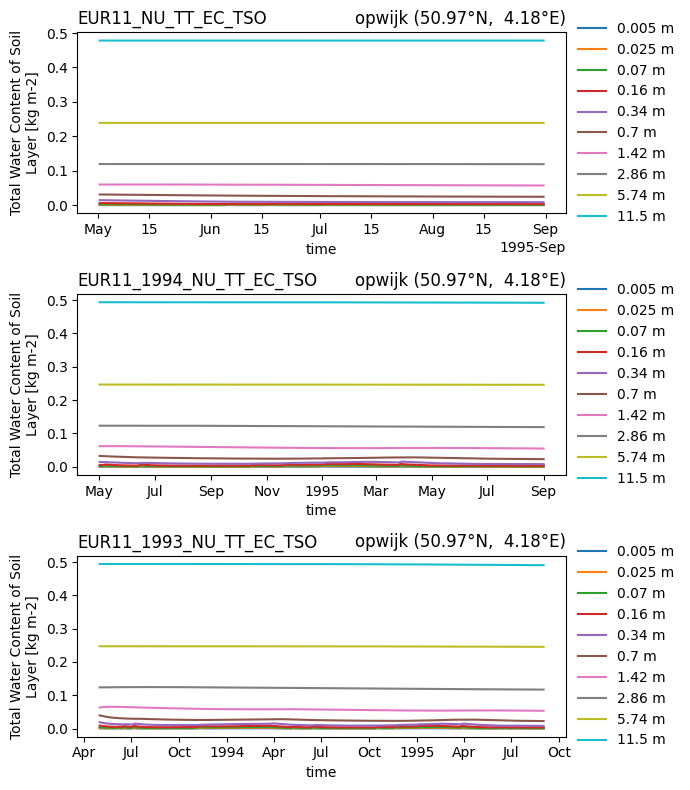

In [32]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
    da_mod_point = ds_mod_point[variable]


    ds_extpar_point = select_point(ds_extpar_soil, point_coord, rotated_pole = True)
    da_bulk_dens_point = ds_extpar_point['BULK_DENS']

    
    da_vol_point = water_content_to_volumetric_water(da_mod_point,da_bulk_dens_point)




    for soil_level in da_mod_point.soil1: 

        da_vol_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        

fig.tight_layout()